Guide: https://analyticsindiamag.com/linear-regression-with-sklearn/

Source: https://www.kaggle.com/crawford/80-cereals

Here we will be taking a look at how to predict the rating of cereals. The problem statement is to predict the cereal ratings where the columns give the exact figures of the ingredients. Link to the data set is mentioned below. 

We will be making the data ready to go and will fit a simple model into it and would also regularise the data to see how good the model can become.

It is advised to read the description of the dataset before proceeding, will help you comprehend the problem better.


**Here since we see that rating column is a continuous data thus it is a regression problem. **


hides all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

imports<br>
pandas 

In [3]:
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns
# utils
import utils

############################################################<br>
Read Data <br>
############################################################

read dataset

In [5]:
df = pd.read_csv('..\dataset/cereal-data.csv')
##############################################################
# Exploratory Data Analytics
##############################################################

columns

In [6]:
print("\n*** Columns ***")
print(df.columns)


*** Columns ***
Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


info

In [7]:
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


summary

In [8]:
print("\n*** Summary ***")
#print(df.describe())
print(df.describe(include=np.number))
print(df.describe(include=np.object))


*** Summary ***
         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.15

head

In [9]:
print("\n*** Head ***")
print(df.head())


*** Head ***
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


############################################################<br>
Dependent Variable <br>
############################################################

store dep variable  <br>
change as required

In [11]:
depVars = "rating"
print("\n*** Dep Vars ***")
print(depVars)


*** Dep Vars ***
rating


############################################################<br>
Data Transformation<br>
############################################################

drop cols which contain:
<br>identifiers<br>nominals<br>descriptions<br>
change as required<br>
in this case name is identifiers

In [12]:
print("\n*** Drop Cols ***")
df = df.drop('name', axis=1)
print("Done ...")


*** Drop Cols ***
Done ...


transformations<br>
change as required

In [13]:
print("\n*** Transformations ***")


*** Transformations ***


since the gender is an independent variable, it has to be converted into numeric or categoric numeric<br>
convert string / categoric to numeric

In [14]:
print("Unique type")
print(df['type'].unique())
#there are only two values H and C.
#so in this case its good to use mapping
df['type'] = df['type'].map({"C": 0, "H": 1})
#df['gender'] = pd.Categorical(df['gender'])
#df['gender'] = df['gender'].cat.codes
print(df['type'].unique())

Unique type
['C' 'H']
[0 1]


convert string / categoric to numeric

In [16]:
print("Unique mfr")
print(df['mfr'].unique())
#mfr has lots of values so we go for labelencoder method of transforming.
from sklearn import preprocessing
leReg = preprocessing.LabelEncoder()
df['mfr'] = leReg.fit_transform(df['mfr'])
print(df['mfr'].unique())
print("Done ...")

Unique mfr
['N' 'Q' 'K' 'R' 'G' 'P' 'A']
[3 5 2 6 1 4 0]
Done ...


check outlier count

In [17]:
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))


*** Outlier Count ***
mfr          0
type         3
calories     6
protein      0
fat          0
sodium       0
fiber        2
carbo        0
sugars       0
potass       0
vitamins    14
shelf        0
weight      13
cups         0
rating       0
dtype: int64


check outlier values

In [18]:
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))


*** Outlier Values ***
mfr                                                        []
type                                                  [1 1 1]
calories                            [ 50 150 150 160  50  50]
protein                                                    []
fat                                                        []
sodium                                                     []
fiber                                               [10. 14.]
carbo                                                      []
sugars                                                     []
potass                                                     []
vitamins    [  0   0 100 100 100   0   0   0   0   0   0 1...
shelf                                                      []
weight      [1.33 1.25 1.33 1.3  1.5  1.33 1.25 1.33 0.5  ...
cups                                                       []
rating                                                     []
dtype: object


handle outliers if required

check variance

In [19]:
print('\n*** Variance In Columns ***')
print(df.var())


*** Variance In Columns ***
mfr            2.990431
type           0.037936
calories     379.630895
protein        1.198565
fat            1.012987
sodium      7027.853725
fiber          5.680424
carbo         18.309467
sugars        19.757006
potass      5081.809638
vitamins     499.188312
shelf          0.693096
weight         0.022643
cups           0.054157
rating       197.326321
dtype: float64


check std dev 

In [20]:
print('\n*** StdDev In Columns ***')
print(df.std())


*** StdDev In Columns ***
mfr          1.729286
type         0.194771
calories    19.484119
protein      1.094790
fat          1.006473
sodium      83.832295
fiber        2.383364
carbo        4.278956
sugars       4.444885
potass      71.286813
vitamins    22.342523
shelf        0.832524
weight       0.150477
cups         0.232716
rating      14.047289
dtype: float64


check mean

In [21]:
print('\n*** Mean In Columns ***')
print(df.mean())


*** Mean In Columns ***
mfr           2.727273
type          0.038961
calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.597403
sugars        6.922078
potass       96.077922
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
rating       42.665705
dtype: float64


handle normalization if required

check zeros

In [22]:
print('\n*** Columns With Zeros ***')
print((df==0).sum())


*** Columns With Zeros ***
mfr          1
type        74
calories     0
protein      0
fat         27
sodium       9
fiber       19
carbo        0
sugars       7
potass       0
vitamins     8
shelf        0
weight       0
cups         0
rating       0
dtype: int64


handle zeros if required

check nulls

In [23]:
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 


*** Columns With Nulls ***
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


handle nulls if required

check relation with corelation - table

In [24]:
print("\n*** Correlation Table ***")
pd.options.display.float_format = '{:,.3f}'.format
print(df.corr())


*** Correlation Table ***
            mfr   type  calories  protein    fat  sodium  fiber  carbo  \
mfr       1.000 -0.007    -0.076    0.017  0.078  -0.176  0.056 -0.063   
type     -0.007  1.000    -0.072    0.269 -0.003  -0.322 -0.078 -0.123   
calories -0.076 -0.072     1.000    0.019  0.499   0.301 -0.293  0.251   
protein   0.017  0.269     0.019    1.000  0.208  -0.055  0.500 -0.131   
fat       0.078 -0.003     0.499    0.208  1.000  -0.005  0.017 -0.318   
sodium   -0.176 -0.322     0.301   -0.055 -0.005   1.000 -0.071  0.356   
fiber     0.056 -0.078    -0.293    0.500  0.017  -0.071  1.000 -0.356   
carbo    -0.063 -0.123     0.251   -0.131 -0.318   0.356 -0.356  1.000   
sugars   -0.133 -0.285     0.562   -0.329  0.271   0.101 -0.141 -0.332   
potass   -0.003 -0.080    -0.067    0.549  0.193  -0.033  0.903 -0.350   
vitamins -0.275 -0.181     0.265    0.007 -0.031   0.361 -0.032  0.258   
shelf     0.003 -0.132     0.097    0.134  0.264  -0.070  0.298 -0.102   
weight   -0

handle multi colinearity if required

############################################################<br>
Visual Data Analytics<br>
############################################################

check relation with corelation - heatmap<br>

emoving column will be done using pvalue, it means if columns are correlated internally then corresponding p-value will be higher than 0.0.5 for one of those clolumns which we will drop them.
<br>
From heatmap we can understand multicolinearity of all the variables, in our graph dark green and dark pink means high correlation.<br>
if correlation of rating and all the other columns is high(dark colors means -+0.6) there is no problem<br>
but if the correlation is high btw independent variables then it shows <br>
multi-colinearity btw them which has to be handled by removing one of those columns.


*** Heat Map ***


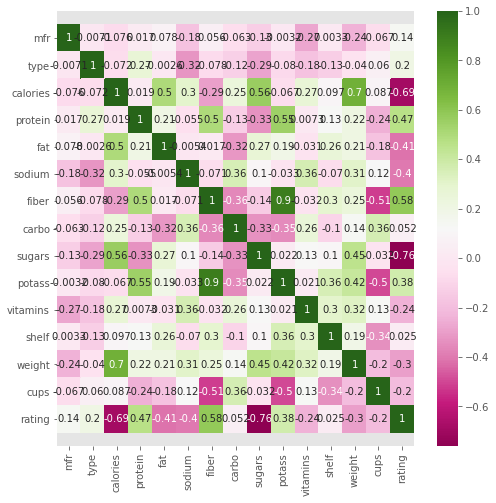

In [26]:
print("\n*** Heat Map ***")
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
# data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

boxplot


*** Boxplot ***


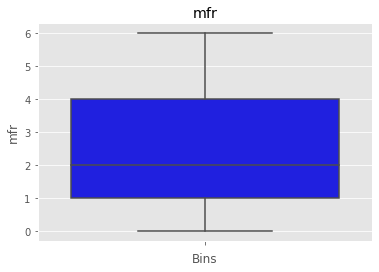

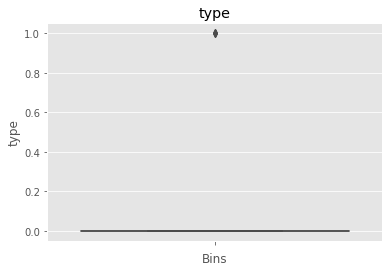

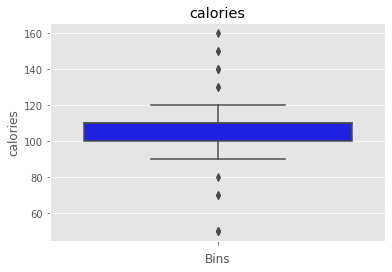

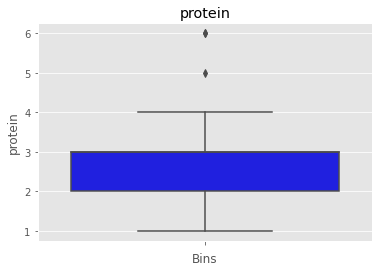

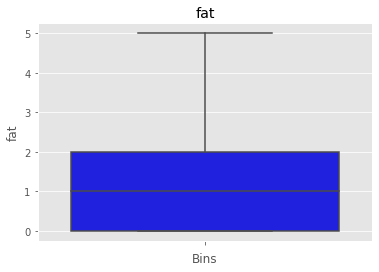

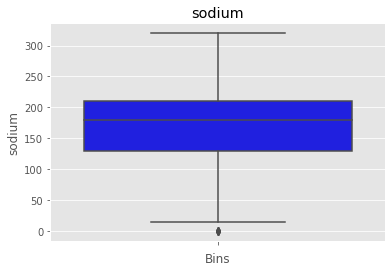

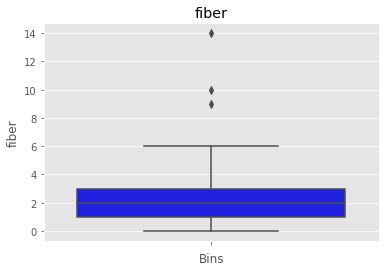

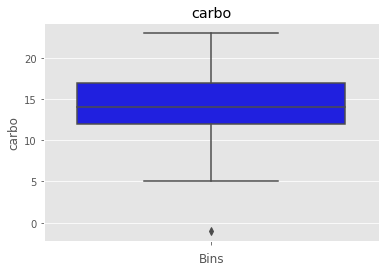

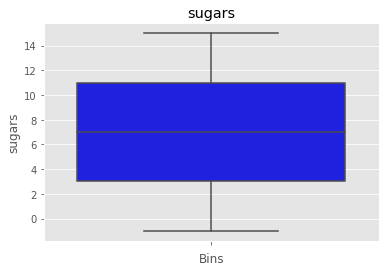

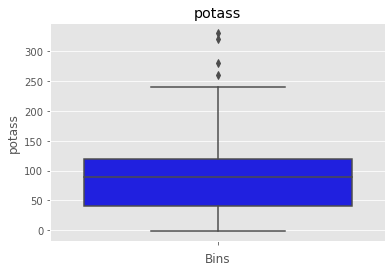

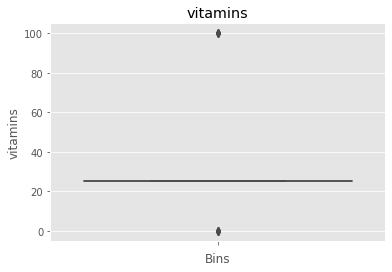

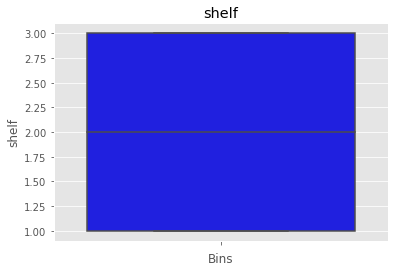

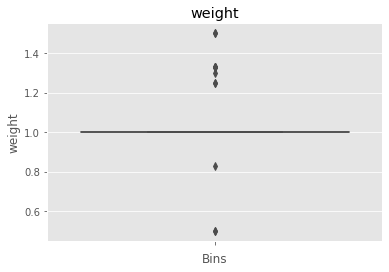

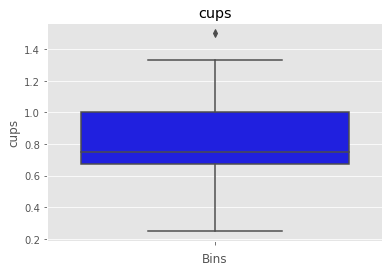

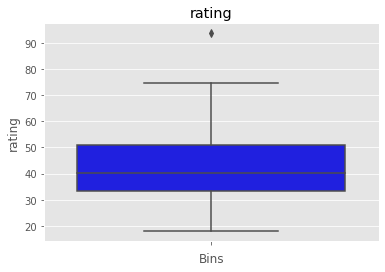

In [27]:
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

histograms<br>
https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/<br>
plot histograms


*** Histograms ***


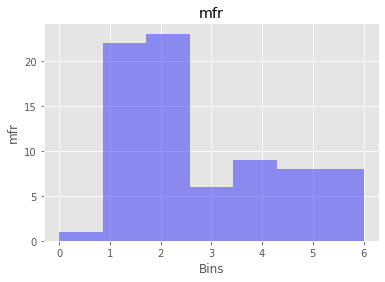

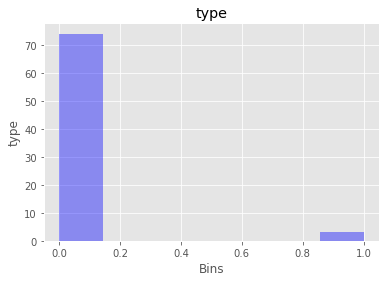

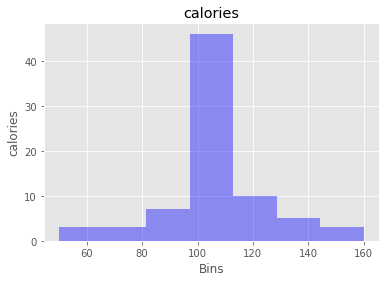

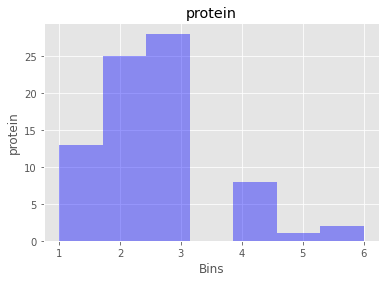

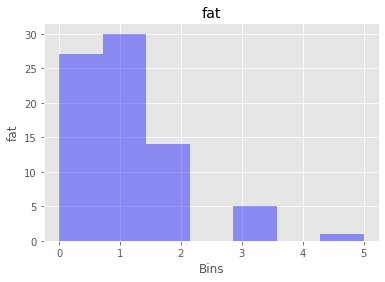

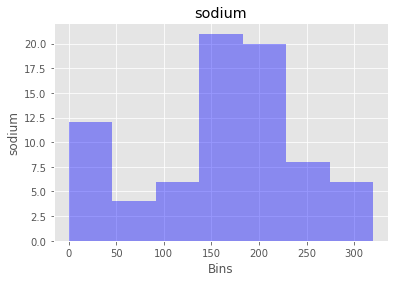

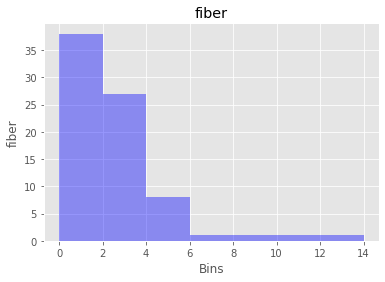

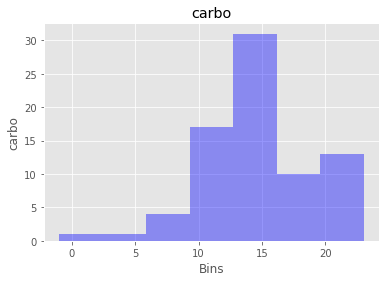

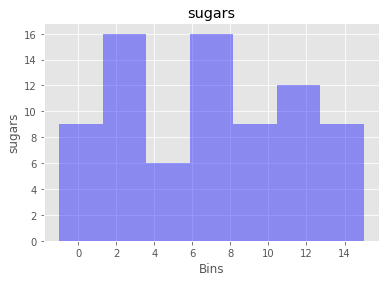

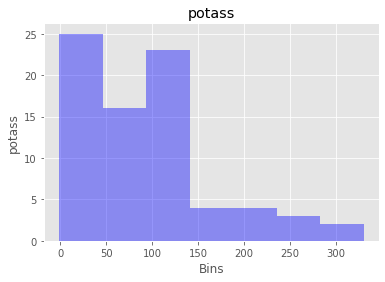

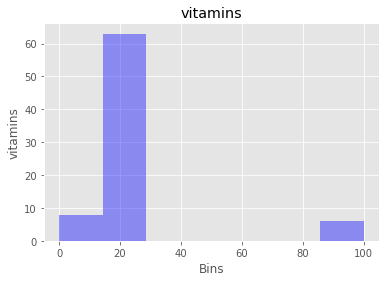

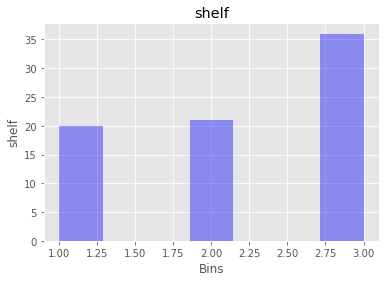

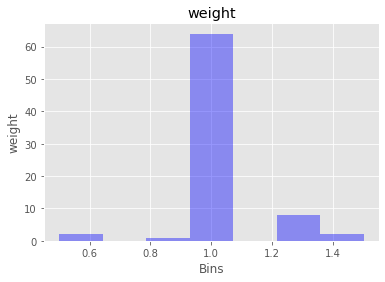

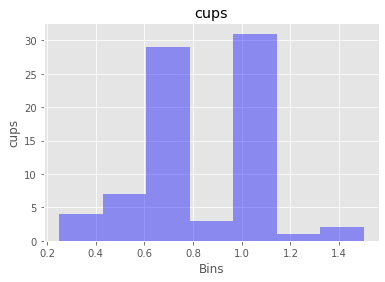

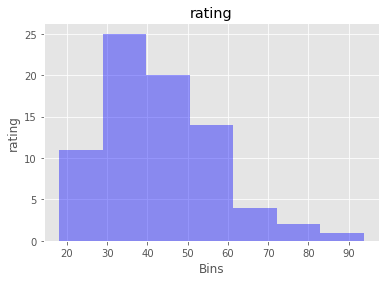

In [28]:
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

scatterplots<br>
plot Sscatterplot


*** Scatterplot ***
rating


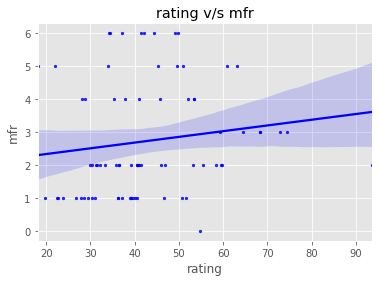

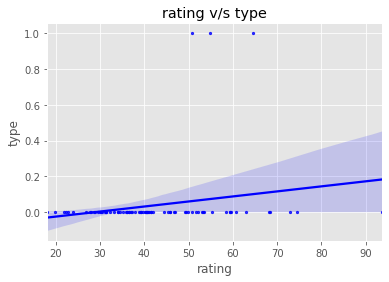

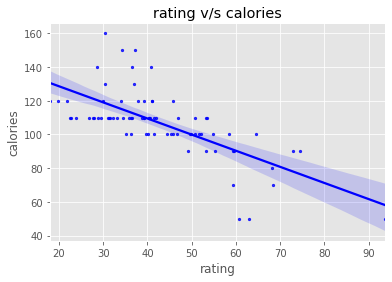

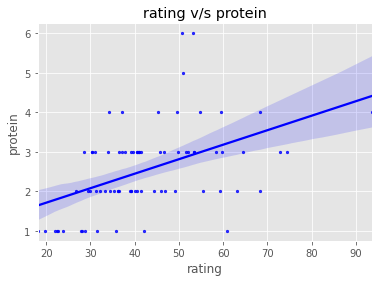

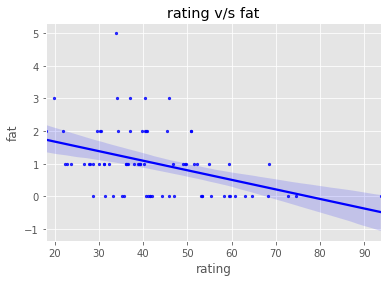

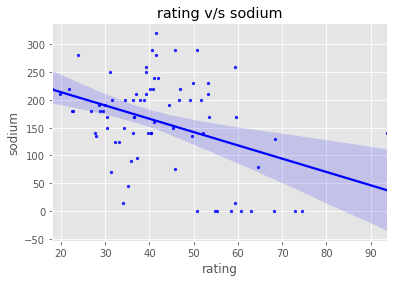

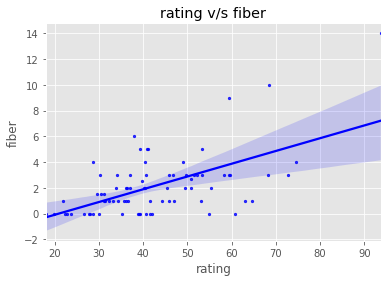

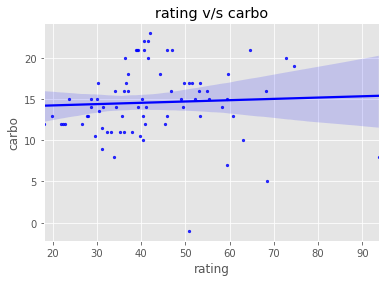

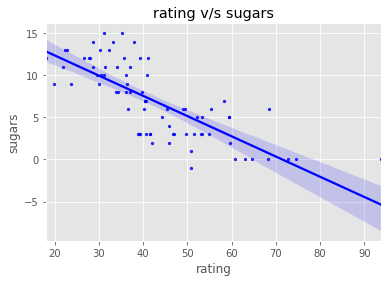

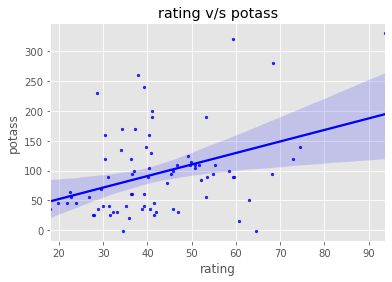

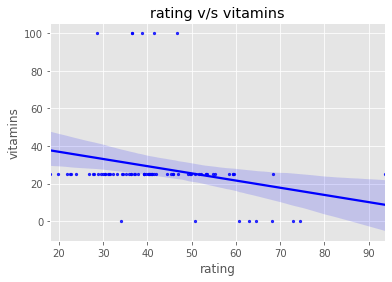

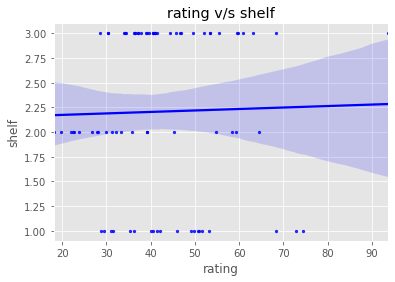

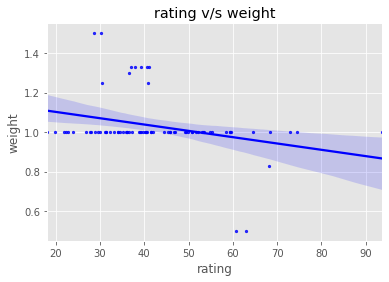

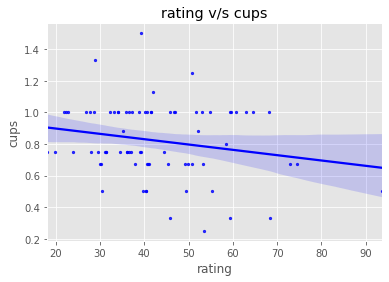

In [29]:
print('\n*** Scatterplot ***')
colNames = df.columns.tolist()
colNames.remove(depVars)
print(colName)
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.regplot(data=df, x=depVars, y=colName, color= 'b', scatter_kws={"s": 5})
    plt.title(depVars + ' v/s ' + colName)
    plt.show()

class count plot<br>
change as required


*** Didfstribution Plot ***


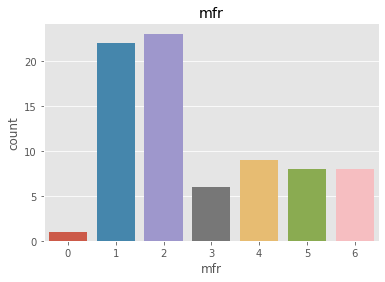

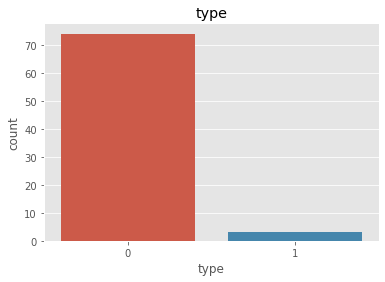

In [30]:
colNames =['mfr', 'type']
print("\n*** Didfstribution Plot ***")
for colName in colNames:
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()

##############################<br>
Split Train & Test<br>
#############################

split into data & target<br>
raction of train data is 80% and test data will be 20%.

In [32]:
print("\n*** Prepare Data ***")
dftrain = df.sample(frac=0.8, random_state=707)
dftest=df.drop(dftrain.index)
print("Train Count:",len(dftrain.index))
print("Test Count :",len(dftest.index))


*** Prepare Data ***
Train Count: 62
Test Count : 15


############################################################<br>
Model Creation & Fitting <br>
############################################################

all cols except dep var 

In [33]:
print("\n*** Regression Data For Train ***")
allCols = dftrain.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)


*** Regression Data For Train ***
['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']
['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']


regression summary for feature<br>
https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [34]:
print("\n*** Regression Summary ***")
import statsmodels.api as sm
X = sm.add_constant(dftrain[allCols])
y = dftrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary ***
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.907e+15
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:40:29   Log-Likelihood:                 848.86
No. Observations:                  62   AIC:                            -1668.
Df Residuals:                      47   BIC:                            -1636.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272   

remove columns with p-value > 0.05 bcoz we will not consider them<br>
e just remove from the list.<br>
chnage as require

In [35]:
allCols.remove('mfr')
allCols.remove('type')
allCols.remove('shelf')
allCols.remove('weight')
allCols.remove('cups')
print(allCols)

['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']


regression summary for feature<br>
ere we are cheching the columns having pvalues less than 0.05 after drop those greater than 0.05<br>
n the summay pvalue=0.000 means it is close to zero pvalue cant be zero.

In [36]:
print("\n*** Regression Summary Again ***")
#here capital X shows 2D array of independent vars and y shows dependent variable charges
X = sm.add_constant(dftrain[allCols])
y = dftrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.483e+16
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:41:05   Log-Likelihood:                 847.83
No. Observations:                  62   AIC:                            -1676.
Df Residuals:                      52   BIC:                            -1654.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9

now create linear regression model<br>
we want to make sure our data is in 2D array<br>
irst we soould convert df into array and then into 2D array.

In [37]:
print("\n*** Regression Model ***")
X = dftrain[allCols].values#--- X has to be 2D array
y = dftrain[depVars].values#----y can be 1D array
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Regression Model ***
(62, 9)
(62,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model)
print("Done ...")

LinearRegression()
Done ...


############################################################<br>
predict with train data <br>
############################################################

predict

In [39]:
print("\n*** Predict - Train Data ***")
p = model.predict(X)
dftrain['predict'] = p
print("Done ...")


*** Predict - Train Data ***
Done ...


############################################################<br>
Model Evaluation - Train Data<br>
############################################################

visualize 


*** Scatter Plot ***


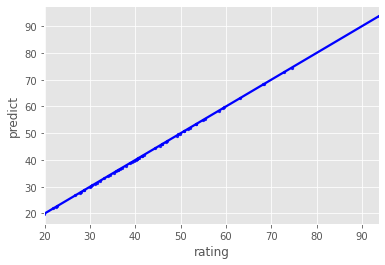

In [40]:
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=dftrain, x=depVars, y='predict', color='b', scatter_kws={"s": 5})
plt.show()

mae 

In [41]:
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dftrain[depVars], dftrain['predict'])
print(mae)


*** Mean Absolute Error ***
2.445968749406523e-07


mse 

In [42]:
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dftrain[depVars], dftrain['predict'])
print(mse)
   
# rmse : it shows
#https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)
#since the rsqr is so high, rmse will be very low and we dont need to use si for evltn bcoz si
#wont give us good result, rmse itself is used for evaluating the model.
# check mean
print('\n*** Mean ***')
print(dftrain[depVars].mean())
print(dftrain['predict'].mean())


*** Mean Squared Error ***
7.761063708918315e-14

*** Root Mean Squared Error ***
2.785868573518556e-07

*** Mean ***
43.17387077419355
43.17387077419355


scatter index (SI) is defined to judge whether RMSE is good or not. <br>
SI=RMSE/measured data mean. <br>
If SI is less than one, your estimations are acceptable.<br>
closer to zero the better the model is.

In [45]:
print('\n*** Scatter Index ***')
si = rmse/dftrain[depVars].mean()
print(si)
#here si is 6.4 which is not good result, that is why we use rmse for evaltn
##############################################################
# confirm with test data 
##############################################################


*** Scatter Index ***
6.452672701248186e-09


all cols except dep var 

In [49]:
print("\n*** Regression Data For Test data ***")
print(allCols)
# split
X = dftest[allCols].values
y = dftest[depVars].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Regression Data For Test data ***
['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
(15, 9)
(15,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


predict

In [50]:
print("\n*** Predict - Test Data ***")
p = model.predict(X)
dftest['predict'] = p
print("Done ...")


*** Predict - Test Data ***
Done ...


############################################################<br>
Model Evaluation - Test Data<br>
############################################################

visualize 


*** Scatter Plot ***


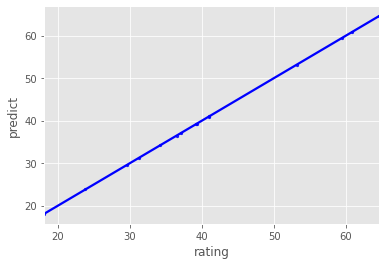

In [51]:
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=dftest, x=depVars, y='predict', color='b', scatter_kws={"s": 5})
plt.show()

mae 

In [52]:
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dftest[depVars], dftest['predict'])
print(mae)


*** Mean Absolute Error ***
2.592088852300852e-07


mse 

In [54]:
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dftest[depVars], dftest['predict'])
print(mse)
   
# rmse 
# RMSE measures the error.  How good is an error depends on the amplitude of your data. 
# RMSE should be less 10% for mean(depVars)
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)
#if rmse is >100 ,we should check SI value. else rmse itself is used for evltn.
# check mean
print('\n*** Mean ***')
print(dftest[depVars].mean())
print(dftest['predict'].mean())
 
# scatter index
# scatter index less than 1; the predictions are decent
print('\n*** Scatter Index ***')
si = rmse/dftest[depVars].mean()
print(si)


*** Mean Squared Error ***
1.0248536157759746e-13

*** Root Mean Squared Error ***
3.2013334968040655e-07

*** Mean ***
40.5652864
40.56528629104394

*** Scatter Index ***
7.891805484218313e-09


############################################################<br>
predict from new data <br>
############################################################

create model from full new dataset

In [55]:
print(allCols)

['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']


regression summary for feature

In [56]:
print("\n*** Regression Summary Again ***")
X = sm.add_constant(df[allCols])
y = df[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.819e+16
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:44:13   Log-Likelihood:                 1051.9
No. Observations:                  77   AIC:                            -2084.
Df Residuals:                      67   BIC:                            -2060.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9

now create linear regression model

In [57]:
print("\n*** Regression Model ***")
X = df[allCols].values
y = df[depVars].values
model = LinearRegression()
model.fit(X,y)
print(model)


*** Regression Model ***
LinearRegression()


read dataset

In [59]:
dfp = pd.read_csv('..\dataset/cereal-data-prd.csv')

In [60]:
print("\n*** Structure ***")
print(dfp.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5 non-null      object 
 1   mfr       5 non-null      object 
 2   type      5 non-null      object 
 3   calories  5 non-null      int64  
 4   protein   5 non-null      int64  
 5   fat       5 non-null      int64  
 6   sodium    5 non-null      int64  
 7   fiber     5 non-null      int64  
 8   carbo     5 non-null      int64  
 9   sugars    5 non-null      int64  
 10  potass    5 non-null      int64  
 11  vitamins  5 non-null      int64  
 12  shelf     5 non-null      int64  
 13  weight    5 non-null      int64  
 14  cups      5 non-null      float64
 15  rating    5 non-null      int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 768.0+ bytes
None


drop cols <br>
change as required<br>
fp = dfp.drop('name', axis=1)<br>
change as required<br>
convert string / categoric to numeric<br>
fp['type'] = dfp['type'].map({"c": 0, "h": 1})<br>
convert string / categoric to numeric<br>
convert string / categoric to numeric<br>
fp['mfr'] = leReg.transform(dfp['mfr'])

split X & y

In [61]:
prd_X = dfp[allCols].values
prd_y = dfp[depVars].values

predict

In [64]:
prd_p = model.predict(prd_X)
dfp['predict'] = prd_p

evaluation<br>
visualize <br>
we cant do this bcoz we dont have values of the dependent variables<br>
to compare with. here rating is all zeros, so can just print the predicted values.<br>


In [65]:
for index in dfp.index:
    print(dfp['name'][index],dfp['predict'][index])

A 48.97310265508919
B 54.208835650158804
C 45.4471191364649
D 26.79862285917764
E 53.04050783669666
